### The Reuters dataset
You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics;

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

### Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

## Preparint the data
####  Encoding the input data

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
    results[i, j] = 1.
 return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Encoding the labels

In [8]:
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
   results[i, label] = 1.
 return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [9]:
#Note that there is a built-in way to do this in Keras:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

### Compiling the model

In [11]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

### Setting aside a validation set

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### training data

In [13]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.4019 - loss: 3.1912 - val_accuracy: 0.5870 - val_loss: 1.8414
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6432 - loss: 1.6617 - val_accuracy: 0.6870 - val_loss: 1.3815
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7322 - loss: 1.2357 - val_accuracy: 0.7360 - val_loss: 1.1995
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7874 - loss: 0.9874 - val_accuracy: 0.7680 - val_loss: 1.0948
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8161 - loss: 0.8400 - val_accuracy: 0.7890 - val_loss: 1.0005
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8565 - loss: 0.6822 - val_accuracy: 0.7970 - val_loss: 0.9627
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8808 - loss: 0.5762 - val_accuracy: 0.7940 - val_loss: 0.9258
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9032 - loss: 0.4733 - val_accuracy: 0.7960 - 

Plotting the training and validation loss

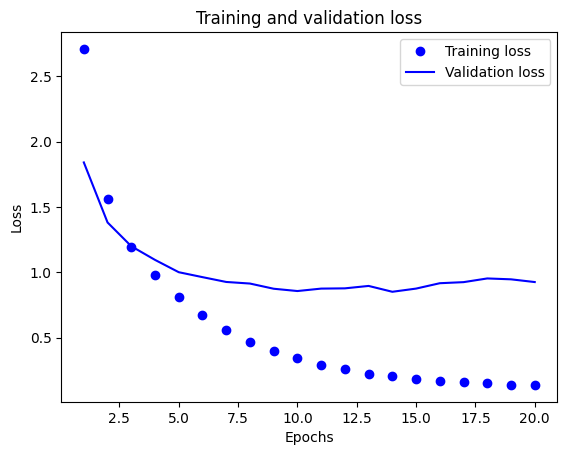

In [14]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

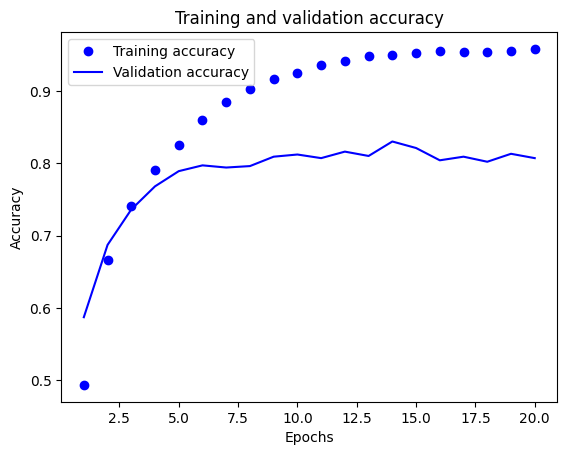

In [15]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

The model begins to overfit after nine epochs. Let’s train a new model from scratch
for nine epochs and then evaluate it on the test set.

## Retraining a model from scratch

In [16]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])



In [17]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [18]:
model.fit(x_train,
 y_train,
 epochs=9,
 batch_size=512)


Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.3649 - loss: 3.1431
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6843 - loss: 1.5216
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7581 - loss: 1.1251
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8070 - loss: 0.9082
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8370 - loss: 0.7530
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8655 - loss: 0.6308
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8900 - loss: 0.5201
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9069 - loss: 0.4479
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9146 - loss: 0.3897


In [19]:
results = model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7972 - loss: 0.9063


In [20]:
results

[0.9254312515258789, 0.7898486256599426]

## Generating predictions on new data

In [21]:
predictions = model.predict(x_test)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [22]:
#Each entry in “predictions” is a vector of length 46:
predictions[0].shape


(46,)

In [23]:
np.sum(predictions[0])

1.0

In [24]:

np.argmax(predictions[0])

4